# Importing and cleaning data

In [28]:
# Import libraries required in the notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Import data from xls file and have a first glimpse
df = pd.read_excel('data/drug_consumption_data.xls')
df.head()  

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [18]:
# Check the Dtypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

## Create dictionaries to map more meaningful descriptions to the categorical features Age, Gender, Education, Country, Ethnicity



In [19]:
# Create the dictionaries to map human-readable descriptions to categorical columns formatted as float

clean_lst = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

clean_dict = {
    'Age' : {
        -0.95197: '18-24',
        -0.07854: '25-34',
        0.49788: '35-44',
        1.09449: '45-54', 
        1.82213: '55-64', 
        2.59171: '65+'      
        },

    'Gender' : {
        0.48246 : 'female',
        -0.48246 : 'male'
        },

    'Education' : {
        -2.43591: 'Left_school_bef_16' ,
        -1.73790: 'Left_school_16' ,
        -1.43719: 'Left_school_17' ,
        -1.22751: 'Left_school_18' ,
        -0.61113: 'Some_college_or_univ' ,
        -0.05921: 'Prof_cert' ,
        0.45468: 'University' ,
        1.16365: 'Masters' ,
        1.98437: 'PhD'
        },

    'Country' : {
        -0.09765: 'AU',
        0.24923: 'CA',
        -0.46841: 'NZ',
        -0.28519: 'Other',
        0.21128: 'IE',
        0.96082: 'UK',
        -0.57009: 'USA'
        },

    'Ethnicity' : {
        -0.50212: 'Asian',
        -1.10702: 'Black',
        1.90725: 'Black_Asian',
        0.12600: 'White_Asian', 
        -0.22166: 'White_Black',
        0.11440: 'Other',
        -0.31685: 'White' 
        }
}


In [20]:
# Map the dictionaries to the dataframe
for feat in clean_lst:
    df[feat] = df[feat].map(clean_dict[feat])

# Check the df
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [21]:
# Check result of cleaning and the remaining 
for feat in clean_lst:
    if any(pd.isna(df[feat].unique())):
        raise ValueError('More unique {} values than defined in cleaning dictionary! Please add the missing value to dictionary.'.format(feat))
    print(feat, ": ", df[feat].unique())

Age :  ['35-44' '25-34' '18-24' '65+' '45-54' '55-64']
Gender :  ['female' 'male']
Education :  ['Prof_cert' 'PhD' 'Masters' 'Left_school_18' 'Left_school_16'
 'University' 'Some_college_or_univ' 'Left_school_bef_16' 'Left_school_17']
Country :  ['UK' 'CA' 'USA' 'Other' 'AU' 'IE' 'NZ']
Ethnicity :  ['White_Asian' 'White' 'Other' 'White_Black' 'Asian' 'Black' 'Black_Asian']


In [22]:
# Drop ID column

df.drop('ID', axis = 1, inplace= True)

In [23]:
# Define non-categorical variables
non_cat_vars = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Define categorical variables
cat_vars = [col for col in df.columns.to_list() if col not in non_cat_vars]

# Cast variable type for categorical variables
for feat in cat_vars:
    df[feat] = df[feat].astype('category')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        1885 non-null   category
 1   Gender     1885 non-null   category
 2   Education  1885 non-null   category
 3   Country    1885 non-null   category
 4   Ethnicity  1885 non-null   category
 5   Nscore     1885 non-null   float64 
 6   Escore     1885 non-null   float64 
 7   Oscore     1885 non-null   float64 
 8   Ascore     1885 non-null   float64 
 9   Cscore     1885 non-null   float64 
 10  Impulsive  1885 non-null   float64 
 11  SS         1885 non-null   float64 
 12  Alcohol    1885 non-null   category
 13  Amphet     1885 non-null   category
 14  Amyl       1885 non-null   category
 15  Benzos     1885 non-null   category
 16  Caff       1885 non-null   category
 17  Cannabis   1885 non-null   category
 18  Choc       1885 non-null   category
 19  Coke       1885 non-null   

In [24]:
# Drop columns of drugs not to be considered
not_considered = ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Nicotine']

df = df.drop(not_considered, axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        1885 non-null   category
 1   Gender     1885 non-null   category
 2   Education  1885 non-null   category
 3   Country    1885 non-null   category
 4   Ethnicity  1885 non-null   category
 5   Nscore     1885 non-null   float64 
 6   Escore     1885 non-null   float64 
 7   Oscore     1885 non-null   float64 
 8   Ascore     1885 non-null   float64 
 9   Cscore     1885 non-null   float64 
 10  Impulsive  1885 non-null   float64 
 11  SS         1885 non-null   float64 
 12  Amphet     1885 non-null   category
 13  Amyl       1885 non-null   category
 14  Benzos     1885 non-null   category
 15  Coke       1885 non-null   category
 16  Crack      1885 non-null   category
 17  Ecstasy    1885 non-null   category
 18  Heroin     1885 non-null   category
 19  Ketamine   1885 non-null   

In [25]:
# Define addicts to be observations in any drug type of where the classification is either CL5 or CL6

# List of all drugs
drugs = df.columns.to_list()[12:]

# Define function to map 1 or 0 to drug, where 1 is addicted and 0 is not addicted
def addicted(x):
    if x == "CL5" or x == "CL6":
        return 1
    else:
        return 0

# Map defined function to drug columns and cast as type "int"
for drug in drugs:
    df[drug] = df[drug].map(lambda x: addicted(x)).astype('int')

# Check result
df[df['Heroin']>0].head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Semer,VSA
452,45-54,male,PhD,UK,White,-0.14882,-0.57545,0.88309,-0.76096,-0.27607,...,0,0,1,0,0,0,1,0,0,0
665,35-44,male,Some_college_or_univ,UK,White,0.91093,-0.69509,1.24033,-0.30172,0.25953,...,0,0,1,0,0,0,1,0,0,0
793,18-24,male,Some_college_or_univ,USA,White,0.41667,-0.94779,-0.31776,0.43852,-0.14277,...,0,0,1,0,1,0,0,1,0,0
802,18-24,female,University,CA,White,1.98437,-1.50796,1.43533,-1.77200,0.41594,...,0,0,1,1,0,1,0,1,0,0
811,25-34,male,University,USA,White,0.52135,-0.57545,0.72330,-1.62090,0.41594,...,0,0,1,0,0,0,0,0,0,0


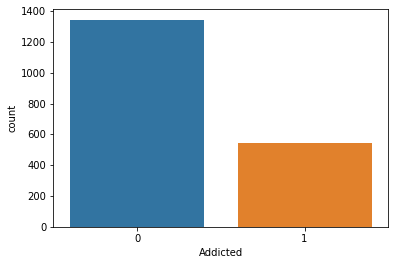

In [30]:
# Add "addicted" column if any of the class for any of the drugs considered was CL5 or CL6 (in other words, being 1) 
df['Addicted'] = (df[drugs].sum(axis = 1) > 0) * 1

sns.countplot(x = 'Addicted', data = df)
plt.show()

In [31]:
# Export data to html and csv (html for seeing all data in tabular form in a browser)
df.to_html('data/drugs.html')
df.to_csv('data/drug_consumption_clean.csv')